<a href="https://colab.research.google.com/github/Sirikorn17/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [67]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [68]:

# split into X and y
y = data["label"] # label คือ คอลัมน์เป้าหมาย หรือสิ่งที่เราต้องการทำนาย เช่น "มีโรคหัวใจหรือไม่"
X = data.drop("label", axis=1) # X คือ ข้อมูลคุณลักษณะ (features) ทั้งหมดที่ใช้ทำนาย

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [69]:
params = {'max_depth': [3, 6, 9, 12]} # max_depth = [3, 6, 9, 12] คือ ค่าของพารามิเตอร์ที่คุณต้องการให้ GridSearchCV ลองเปรียบเทียบเพื่อหา “ค่าที่ดีที่สุด”

# ลองใช้ต้นไม้ลึกไม่เกิน 3 ชั้น, ลึกไม่เกิน 6 ชั้น, ลึกไม่เกิน 9 ชั้น, ลึกไม่เกิน 12 ชั้น GridSearchCV จะสร้างโมเดล Decision Tree ใหม่สำหรับแต่ละค่าที่ระบุ แล้วเปรียบเทียบว่าอันไหนให้ accuracy ดีที่สุด

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5) # Cross-Validation 5 เท่า (k=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [70]:
gridcv.best_estimator_ # จะคืนค่ามาเป็น โมเดลที่ดีที่สุด พร้อมพารามิเตอร์ที่เหมาะสม

DecisionTreeClassifier(max_depth=3)

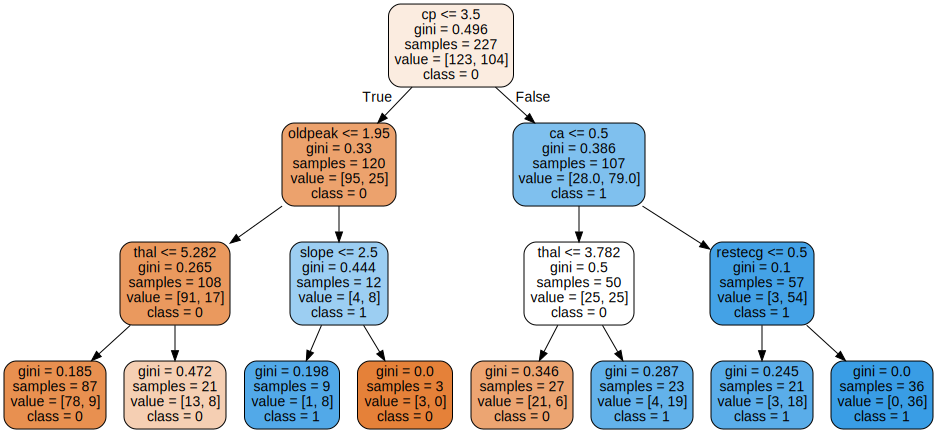

In [71]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [72]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [73]:
clf = DecisionTreeClassifier()

In [74]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8
    )
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.73      0.86      0.79        35

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [75]:
forest = RandomForestClassifier(
    n_estimators=200, max_depth=6)

forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        41
           1       0.78      0.91      0.84        35

    accuracy                           0.84        76
   macro avg       0.85      0.85      0.84        76
weighted avg       0.85      0.84      0.84        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [76]:
from sklearn.metrics import f1_score, accuracy_score

# **Decision Tree**

In [84]:
# Create a pipeline with imputation and Decision Tree
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('dt', DecisionTreeClassifier())
])

# Define the parameter grid for Decision Tree (กำหนดพารามิเตอร์ 3 ตัวสำหรับ DecisionTreeClassifier)
dt_params = {
    'dt__max_depth': [3, 5, 7, 10], # ความลึกสูงสุดของต้นไม้ (ควบคุมความซับซ้อนของโมเดล)
    'dt__min_samples_split': [2, 5, 10], # จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดก่อนจะแยกโหนดต่อไป
    'dt__min_samples_leaf': [1, 2, 4], # จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดใบ (node สุดท้าย)
}

# Perform GridSearchCV
dt_grid_search = GridSearchCV(dt_pipeline, dt_params, scoring='accuracy', cv=5)
dt_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7, 10],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [85]:
print("Best parameters for Decision Tree :", dt_grid_search.best_params_)
print("Best cross-validation accuracy for Decision Tree :", dt_grid_search.best_score_)

Best parameters for Decision Tree : {'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Best cross-validation accuracy for Decision Tree : 0.7885024154589372


In [86]:
print(classification_report(y_test, dt_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.81      0.74      0.78        35

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [87]:
dt_pred = dt_grid_search.predict(X_test)
print("F1 Macro:", f1_score(y_test, dt_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, dt_pred))

F1 Macro: 0.7998244073748902
Accuracy: 0.8026315789473685


# **Bagged Decision Trees**

In [88]:
# Create a pipeline with imputation and Bagging Classifier
bagging_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

# Define the parameter grid for Bagging Classifier
bagging_params = {
    'bagging__n_estimators': [50, 100, 150, 200],
    'bagging__max_samples': [0.6, 0.8, 1.0],
    'bagging__max_features': [0.6, 0.8, 1.0]
}

# Perform GridSearchCV
bagging_grid_search = GridSearchCV(bagging_pipeline, bagging_params, scoring='accuracy', cv=5)
bagging_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('bagging',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'bagging__max_features': [0.6, 0.8, 1.0],
                         'bagging__max_samples': [0.6, 0.8, 1.0],
                         'bagging__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [89]:
print("Best parameters for Bagged Decision Trees:", bagging_grid_search.best_params_)
print("Best cross-validation accuracy for Bagged Decision Trees:", bagging_grid_search.best_score_)

Best parameters for Bagged Decision Trees: {'bagging__max_features': 0.6, 'bagging__max_samples': 0.8, 'bagging__n_estimators': 100}
Best cross-validation accuracy for Bagged Decision Trees: 0.8192270531400967


In [90]:
print(classification_report(y_test, bagging_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.77      0.86      0.81        35

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [91]:
bagging_pred = bagging_grid_search.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, bagging_pred))
print("F1 Macro:", f1_score(y_test, bagging_pred, average='macro'))


Accuracy: 0.8157894736842105
F1 Macro: 0.8156618156618156


# **Random Forest**

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with imputation and Random Forest Classifier
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for Random Forest Classifier
rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 10]
}


# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [5, 10, 15],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [93]:
print("Best parameters for Random Forest Classifier:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for Random Forest Classifier:", rf_grid_search.best_score_)

Best parameters for Random Forest Classifier: {'rf__max_depth': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best cross-validation accuracy for Random Forest Classifier: 0.8191304347826087


In [94]:
print(classification_report(y_test, rf_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.82      0.89      0.85        35

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [95]:
rf_pred = rf_grid_search.predict(X_test)
print("F1 Macro:", f1_score(y_test, rf_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, rf_pred))

F1 Macro: 0.8550372810820184
Accuracy: 0.8552631578947368


In [96]:
# สรุป F1 Macro & Accuracy ของแต่ละโมเดล

# Evaluate Decision Tree
dt_pred = dt_grid_search.best_estimator_.predict(X_test)
dt_f1_macro = f1_score(y_test, dt_pred, average='macro')
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Test Set Performance:")
print(f"F1 Macro: {dt_f1_macro:.4f}")
print(f"Accuracy: {dt_accuracy:.4f}")

# Evaluate Bagged Decision Trees
bagging_pred = bagging_grid_search.best_estimator_.predict(X_test)
bagging_f1_macro = f1_score(y_test, bagging_pred, average='macro')
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print("\nBagged Decision Trees Test Set Performance:")
print(f"F1 Macro: {bagging_f1_macro:.4f}")
print(f"Accuracy: {bagging_accuracy:.4f}")

# Evaluate Random Forest
rf_pred = rf_grid_search.best_estimator_.predict(X_test)
rf_f1_macro = f1_score(y_test, rf_pred, average='macro')
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Test Set Performance:")
print(f"F1 Macro: {rf_f1_macro:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")

Decision Tree Test Set Performance:
F1 Macro: 0.7998
Accuracy: 0.8026

Bagged Decision Trees Test Set Performance:
F1 Macro: 0.8157
Accuracy: 0.8158

Random Forest Test Set Performance:
F1 Macro: 0.8550
Accuracy: 0.8553


# **Best Model**

In [97]:
model_scores = {
    "Decision Tree": dt_f1_macro,
    "Bagged Decision Trees": bagging_f1_macro,
    "Random Forest": rf_f1_macro
}

# หาโมเดลที่ดีที่สุดโดยดูจากค่า F1 Macro
best_model_name = max(model_scores, key=model_scores.get)
best_f1 = model_scores[best_model_name]

print(f"\nBest model based on F1 Macro score : {best_model_name}")
print(f"with F1 Macro = {best_f1:.4f}")



Best model based on F1 Macro score : Random Forest
with F1 Macro = 0.8550


# **Plot the best tree model**

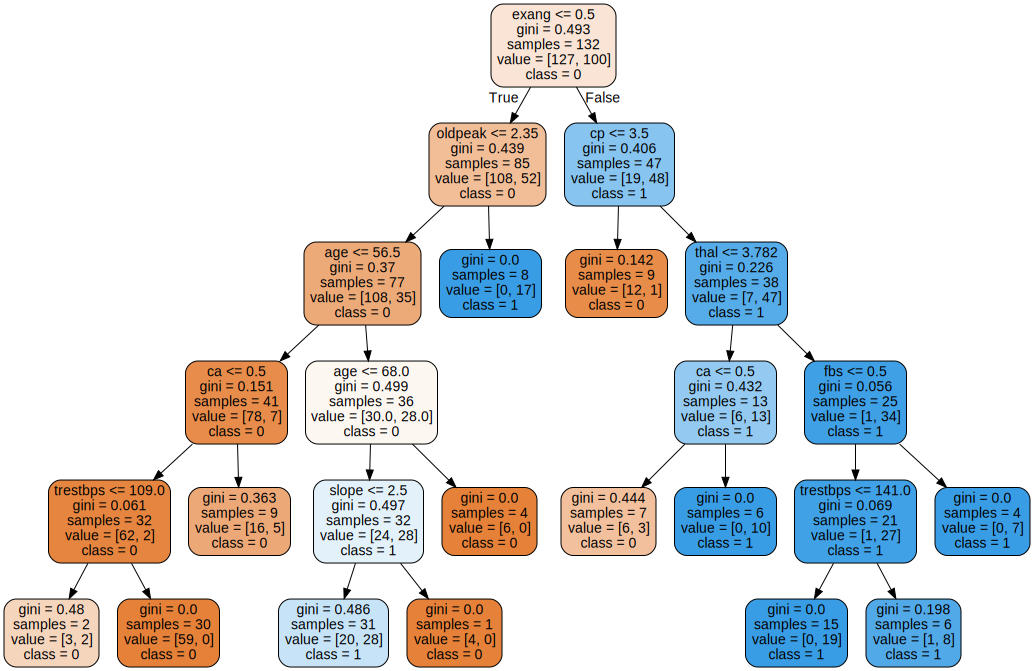

In [119]:
# ดึง Random Forest ที่ดีที่สุดจาก GridSearchCV
best_rf = rf_grid_search.best_estimator_.named_steps['rf']

# ดึงต้นไม้ต้นที่ 0 จาก Random Forest
tree_in_rf = best_rf.estimators_[0]

plot_data = export_graphviz(tree_in_rf,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph


# **What hyperparameters did you choose?**

- **Decision Tree**
พารามิเตอร์ที่เลือกใช้ :
  - dt__max_depth คือ ความลึกสูงสุดของต้นไม้ (ควบคุมความซับซ้อนของโมเดล)
  - dt__min_samples_split คือ จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดก่อนจะแยกโหนดต่อไป
  - dt__min_samples_leaf คือ จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดใบ (node สุดท้าย)

- **Bagged Decision Trees**
พารามิเตอร์ที่เลือกใช้ :
  - bagging__n_estimators คือ
จำนวนต้นไม้ (Decision Trees) ที่จะสร้างในกระบวนการ Bagging ถ้าจำนวนมากจะช่วยให้โมเดลเสถียรขึ้น แต่ใช้เวลามากขึ้น
  - bagging__max_samples คือ
สัดส่วนของตัวอย่างข้อมูลฝึก (training samples) ที่จะสุ่มมาใช้สร้างแต่ละต้นไม้ เช่น 0.6 หมายถึงใช้ข้อมูล 60% ของชุดข้อมูลฝึก
  - bagging__max_features คือ
สัดส่วนของคุณลักษณะ (features) ที่จะสุ่มเลือกมาใช้สร้างแต่ละต้นไม้ เช่น 0.6 หมายถึงใช้ 60% ของฟีเจอร์ทั้งหมดในการสร้างแต่ละต้นไม้ ช่วยเพิ่มความหลากหลายของต้นไม้ใน ensemble

- **Random Forest**
พารามิเตอร์ที่เลือกใช้ :
  - rf__n_estimators เพื่อกำหนดจำนวนต้นไม้ (Trees) ในป่า ยิ่งมาก โมเดลยิ่งเสถียร แต่ใช้เวลาในการเทรนมากขึ้น
  - rf__max_depth คือ ความลึกสูงสุดของแต่ละต้นไม้ ควบคุมไม่ให้ต้นไม้ลึกเกินไปเพื่อลด overfitting
  - rf__min_samples_split คือ จำนวนตัวอย่างขั้นต่ำที่ต้องมีเพื่อให้สามารถแยกโหนดได้ ยิ่งมาก โมเดลยิ่งเรียบ (regularized) ช่วยลด overfitting



# **Best values of hyperparameters**

In [122]:
# best values of your hyperparameters?
print("Best parameters for Decision Tree :\n", dt_grid_search.best_params_)
print("\nBest parameters for Bagged Decision Trees :\n", bagging_grid_search.best_params_)
print("\nBest parameters for Random Forest Classifier :\n", rf_grid_search.best_params_)

Best parameters for Decision Tree :
 {'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}

Best parameters for Bagged Decision Trees :
 {'bagging__max_features': 0.6, 'bagging__max_samples': 0.8, 'bagging__n_estimators': 100}

Best parameters for Random Forest Classifier :
 {'rf__max_depth': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
